**Type Anotations In LangGraph**

In [1]:
#Typed Dictionary
from typing import TypedDict
class Movie(TypedDict):
  name:str
  year:int

movie=Movie(name="Avengers Endgame",year=2025)

In [2]:
print(movie)

{'name': 'Avengers Endgame', 'year': 2025}


In [3]:
#Union
from typing import Union

def square(x: Union[int, float]) -> float:
    return x * x
# Test with int
x = 12
print("Square of", x, "is", square(x))

# Test with float
x = 9.61
print("Square of", x, "is", square(x))

# Test with string (not allowed in function)
x = 'India Is My Country'
try:
    print("Square of", x, "is", square(x))
except TypeError as e:
    print("Error:", e)


Square of 12 is 144
Square of 9.61 is 92.3521
Error: can't multiply sequence by non-int of type 'str'


In [4]:
#Optional
from typing import Optional
def nice_message(name: Optional[str])->None:
  if name is None:
    print("Hey Person")
  else:
    print(f"Hi There,{name}")

nice_message("Krishna")

Hi There,Krishna


In [5]:
nice_message(None)

Hey Person


In [6]:
#Any
from typing import Any
def print_value(x: Any):
  print(x)           # Anything and everything is allowed

print_value("I Am Indian")
print_value(2025)
print_value(8.1)

I Am Indian
2025
8.1


In [7]:
#Lambda Function
square=lambda x:x*x
square(12)

144

In [8]:
nums=[1,2,3,4,5]
square_list=list(map(lambda x:x*x,nums))
print(square_list)

[1, 4, 9, 16, 25]


**Graph |**

In [9]:
pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.1/467.1 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.9/193.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.3/397.3 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.3/136.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 149.1 MB/s eta 0:00:00


In [10]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph


In [11]:
class AgentState(TypedDict):
  message:str

def greeting_node(state: AgentState)-> AgentState:
  """Simple Node That Adds A Greeting Message To The State"""
  state['message']='Hey ' +state['message']+", how is your day going ? Nice to meet you"
  return state

In [12]:
graph=StateGraph(AgentState)
graph.add_node("greeter",greeting_node)
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app=graph.compile()

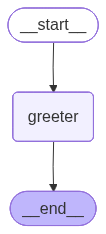

In [13]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
result=app.invoke({"message":"Krishna"})

In [15]:
result["message"]

'Hey Krishna, how is your day going ? Nice to meet you'

**GRAPH ||**

In [16]:
from typing import TypedDict
class ComplimetState(TypedDict):
  name:str
  mood:str  # e.g.,'Sad',"Happy"
  phrase:str

In [17]:
def complement_node(state:ComplimetState)->ComplimetState:
  """Simple Node That Give Complement Message"""
  name=state.get("name","Beautiful Soul")
  mood=state.get("mood","neutral")
  if mood=='sad':
    compliment=f"{name} ,even on my low days,your smile keeps me happy and a strong believe that yor are with me."
  elif mood=='happy':
    compliment=f"{name}, your happiness and love is contagious and infinite - you lift everyone around you!"
  else:
    compliment=f"{name}, you're a constant source of inspiration and career guide and in my life."

  state["phrase"]=compliment
  return state

In [18]:
graph1=StateGraph(ComplimetState)
graph1.add_node("Complement",complement_node)
graph1.set_entry_point("Complement")
graph1.set_finish_point("Complement")

app1=graph1.compile()

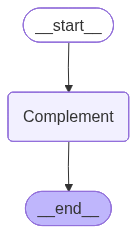

In [19]:
from IPython.display import Image,display
display(Image(app1.get_graph().draw_mermaid_png()))

In [20]:
output = app1.invoke({"name": "Krishna", "mood": "happy", "phrase": ""})
print(output["phrase"])


Krishna, your happiness and love is contagious and infinite - you lift everyone around you!


In [21]:
out=app1.invoke({"name": "Krishna","mood": "sad"})
print(out["phrase"])


Krishna ,even on my low days,your smile keeps me happy and a strong believe that yor are with me.


**GRAPH |||**: **For mathematical operations**

In [22]:
from typing import TypedDict,List
from langgraph.graph import StateGraph

In [23]:
class MathAgent(TypedDict):
  values:List[int]
  name:str
  result:str

In [24]:
def process_values(state: MathAgent)->MathAgent:
  """This function handles multiple differnt inputs to perform  mathematical calculation"""
  state["result"]=f"Hi there {state['name']}! Your required sum is {sum(state['values'])}"
  return state

In [25]:
graph=StateGraph(MathAgent)
graph.add_node("Processor",process_values)
graph.set_entry_point("Processor")
graph.set_finish_point("Processor")
app=graph.compile()

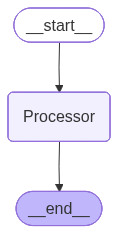

In [26]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [27]:
answers=app.invoke({"values":[12,45,6,32,786,33],"name":"Sam"})

In [28]:
print(answers)

{'values': [12, 45, 6, 32, 786, 33], 'name': 'Sam', 'result': 'Hi there Sam! Your required sum is 914'}


**With User Input**

In [29]:
name=input("Enter your name: ")
values_count=input("Enter the values separated by commas:")

Enter your name: Ko
Enter the values separated by commas:9,5,27,8


In [30]:
value=list(map(int,values_count.split(',')))

In [31]:
answers=app.invoke({"name":name,"values":value})

In [32]:
print(answers)

{'values': [9, 5, 27, 8], 'name': 'Ko', 'result': 'Hi there Ko! Your required sum is 49'}


**GRAPH ||||**: **Agent To Perform Mathematical Calculation**

In [33]:
class CalculationAgent(TypedDict):
  numbers:List[int]
  name:str
  operation:str
  result:str

In [34]:
def calculation_node(state: CalculationAgent) -> CalculationAgent:
    """This function performs a mathematical operation and returns a compliment-based result."""

    name = state["name"]
    operation = state["operation"]
    numbers = state["numbers"]

    try:
        if operation == '+':
            result = sum(numbers)
            calculation = f"{name}, the sum of {numbers} is {result}. You always bring things together beautifully!"

        elif operation == '-':
            result = numbers[0]
            for num in numbers[1:]:
                result -= num
            calculation = f"{name}, the result of subtraction is {result}. Just like how you remove negativity from every room!"

        elif operation == '*':
            result = 1
            for num in numbers:
                result *= num
            calculation = f"{name}, the product is {result}. You multiply joy everywhere you go!"

        elif operation == '/':
            result = numbers[0]
            for num in numbers[1:]:
                result /= num
            calculation = f"{name}, the division result is {result:.2f}. You balance everything with grace!"

        elif operation == '%':
            result = numbers[0]
            for num in numbers[1:]:
                result %= num
            calculation = f"{name}, the modulus result is {result}. You're always that perfect remainder we need!"

        elif operation == '**':
            result = numbers[0]
            for num in numbers[1:]:
                result **= num
            calculation = f"{name}, the exponent result is {result}. Your impact grows exponentially with time!"

        else:
            calculation = f"{name}, please enter a valid operation like +, -, *, /, %, or ** to continue."

    except ZeroDivisionError:
        calculation = f"{name}, division by zero isn't allowed — but your value is always infinite! 💫"
    except Exception as e:
        calculation = f"{name}, there was an unexpected error: {str(e)}"

    state["result"] = calculation
    return state


In [35]:
graph=StateGraph(CalculationAgent)
graph.add_node("Calculator",calculation_node)
graph.set_entry_point("Calculator")
graph.set_finish_point("Calculator")
app=graph.compile()

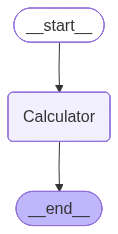

In [36]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))


In [37]:
output=app.invoke({"name":"Sam","numbers":[12,67,43,13],"operation":"+","result":""})


In [38]:
print(output)

{'numbers': [12, 67, 43, 13], 'name': 'Sam', 'operation': '+', 'result': 'Sam, the sum of [12, 67, 43, 13] is 135. You always bring things together beautifully!'}


In [39]:
print(output["result"])

Sam, the sum of [12, 67, 43, 13] is 135. You always bring things together beautifully!


**With User input**

In [40]:
user_name=input("Enter your name: ")
while True:
  oper=input("Enter the operation you want to perform: ")
  number=input("Enter the numbers separated by comma: ")
  try:
    number_input = list(map(int, number.split(',')))
  except:
    print("Invalid Input ! Please enter valid integer numbers separated by commas.")
    continue
  output=app.invoke({"name":user_name,"numbers":number_input,"operation":oper,"result":""})
  print(output["result"])
  choice=input(f"{user_name} Do you want to perform anoter operation(yes/no): ").strip().lower()
  if choice not in['yes','y']:
    print("Thank You ! Have A Nice Day")
    break

Enter your name: Man
Enter the operation you want to perform: **
Enter the numbers separated by comma: 4,8
Man, the exponent result is 65536. Your impact grows exponentially with time!
Man Do you want to perform anoter operation(yes/no): yes
Enter the operation you want to perform: %
Enter the numbers separated by comma: 37,8
Man, the modulus result is 5. You're always that perfect remainder we need!
Man Do you want to perform anoter operation(yes/no): no
Thank You ! Have A Nice Day


**Updated calculation_node() With Validation**

In [41]:
def calculation_node(state: dict) -> dict:
    """Performs a mathematical operation and returns a compliment-based result."""
    name = state["name"]
    operation = state["operation"]
    numbers = state["numbers"]

    try:
        if operation == '+':
            result = sum(numbers)
            calculation = f"{name}, the sum of {numbers} is {result}. You always bring things together beautifully!"

        elif operation == '-':
            result = numbers[0]
            for num in numbers[1:]:
                result -= num
            calculation = f"{name}, the result of subtraction is {result}. Just like how you remove negativity from every room!"

        elif operation == '*':
            result = 1
            for num in numbers:
                result *= num
            calculation = f"{name}, the product is {result}. You multiply joy everywhere you go!"

        elif operation == '/':
            result = numbers[0]
            for num in numbers[1:]:
                result /= num
            calculation = f"{name}, the division result is {result:.2f}. You balance everything with grace!"

        elif operation == '%':
            if len(numbers) != 2:
                calculation = f"{name}, please enter exactly two numbers for modulus operation."
            else:
                try:
                    result = numbers[0] % numbers[1]
                    calculation = f"{name}, the modulus result is {result}. You're always that perfect remainder we need!"
                except ZeroDivisionError:
                    calculation = f"{name}, modulus by zero isn’t possible — but your impact never goes to zero! 💫"

        elif operation == '**':
            if len(numbers) != 2:
                calculation = f"{name}, please enter exactly two numbers for exponentiation."
            else:
                try:
                    result = numbers[0] ** numbers[1]
                    calculation = f"{name}, {numbers[0]} to the power {numbers[1]} is {result}. Your impact grows exponentially with time!"
                except OverflowError:
                    calculation = f"{name}, that exponent is too large — your potential is off the charts! 🚀"

        else:
            calculation = f"{name}, please enter a valid operation like +, -, *, /, %, or ** to continue."

    except ZeroDivisionError:
        calculation = f"{name}, division by zero isn't allowed — but your value is always infinite! 💫"
    except Exception as e:
        calculation = f"{name}, there was an unexpected error: {str(e)}"

    state["result"] = calculation
    return state


In [43]:
user_name = input("Enter your name: ")

while True:
    oper = input("Enter the operation you want to perform (+, -, *, /, %, **): ").strip()
    number = input("Enter the numbers separated by commas: ")

    try:
        number_input = list(map(int, number.split(',')))
    except ValueError:
        print("❌ Invalid Input! Please enter valid integer numbers separated by commas.\n")
        continue

    # App invoke
    output = app.invoke({
        "name": user_name,
        "numbers": number_input,
        "operation": oper,
        "result": ""
    })

    print("\n" + output["result"] + "\n")

    choice = input(f"{user_name}, Do you want to perform another operation (yes/no): ").strip().lower()
    if choice not in ['yes', 'y']:
        print(f"\nThank you, {user_name}! Have a wonderful day! 🌟")
        break


Enter your name: ko
Enter the operation you want to perform (+, -, *, /, %, **): **
Enter the numbers separated by commas: 5,9

ko, the exponent result is 1953125. Your impact grows exponentially with time!

ko, Do you want to perform another operation (yes/no): no

Thank you, ko! Have a wonderful day! 🌟


**Graph |||||: Sequential Graph : Multiple Nodes**

In [44]:
class MultiAgent(TypedDict):
  name:str
  dear:str
  country:str
  age:int
  final:str

In [45]:
def first_node(state: MultiAgent)->MultiAgent:
  """This is first node of our sequence"""
  state["final"]=f"Hi {state['name']}!\n"
  return state

def second_node(state:MultiAgent)->MultiAgent:
  """This is second node of our sequence"""
  state["final"]=state["final"] + f"{state['name']} is {state['age']} years old.\n"
  return state

def third_node(state:MultiAgent)->MultiAgent:
  """This is the third node of our sequence"""
  state["final"]=state["final"]+f"{state['name']} is citizen of country {state['country']}.\n"
  return state

def fourth_node(state:MultiAgent)->MultiAgent:
  """This is the third node of our sequence"""
  state["final"]=state["final"]+f"{state['dear']} is the most lovable and kind hearted person in {state['name']}'s life"
  return state

In [46]:
graph=StateGraph(MultiAgent)
graph.add_node("First Node",first_node)
graph.add_node("Second Node",second_node)
graph.add_node("Third Node",third_node)
graph.add_node("Fourth Node",fourth_node)
graph.set_entry_point("First Node")
graph.add_edge("First Node","Second Node")
graph.add_edge("Second Node","Third Node")
graph.add_edge("Third Node","Fourth Node")
graph.set_finish_point("Fourth Node")
app=graph.compile()

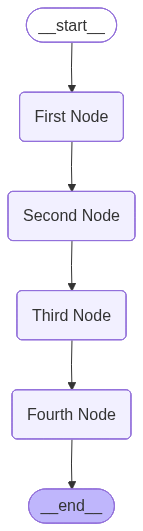

In [47]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [50]:
output=app.invoke({"name":"Sa","dear":"Kri","age":12,"country":"India","final":""})

In [51]:
print(output["final"])

Hi Sa!
Sa is 12 years old.
Sa is citizen of country India.
Kri is the most lovable and kind hearted person in Sa's life


**with User Input**

In [52]:
Name=input("Enter your name: ")
Dear=input("Enter the name of dearest person in my life: ")
Age=input("Enter your age: ")
Country=input("Enter your country: ")
output=app.invoke({"name":Name,"dear":Dear,"age":Age,"country":Country,"final":""})

Enter your name: Raha
Enter the name of dearest person in my life: Moha
Enter your age: 10
Enter your country: Italy 


In [53]:
print(output["final"])

Hi Raha!
Raha is 10 years old.
Raha is citizen of country Italy .
Moha is the most lovable and kind hearted person in Raha's life


**GRAPH: 6**

In [54]:
class MultiAgent(TypedDict):
  name:str
  country:str
  age:int
  skills:List[str]
  final:str

In [55]:
def first_node(state: MultiAgent)->MultiAgent:
  """This is first node of our sequence"""
  state["final"]=f"Hi {state['name']}!\n"
  return state

def second_node(state:MultiAgent)->MultiAgent:
  """This is second node of our sequence"""
  state["final"]=state["final"] + f"{state['name']} is {state['age']} years old.\n"
  return state

def third_node(state:MultiAgent)->MultiAgent:
  """This is the third node of our sequence"""
  state["final"]=state["final"]+f"{state['name']} is citizen of country {state['country']}.\n"
  return state

def fourth_node(state:MultiAgent)->MultiAgent:
  """This is the third node of our sequence"""
  skills = state["skills"]
  if len(skills) == 0:
    skill_text = "no skills listed"
  elif len(skills) == 1:
    skill_text = skills[0]
  elif len(skills) == 2:
    skill_text = f"{skills[0]} and {skills[1]}"
  else:
    skill_text = f"{', '.join(skills[:-1])} and {skills[-1]}"
  state["final"]=state["final"]+f"Skills of {state['name']} are: {skill_text}"
  return state

In [56]:
graph=StateGraph(MultiAgent)
graph.add_node("Name",first_node)
graph.add_node("Age",second_node)
graph.add_node("Country",third_node)
graph.add_node("Skills",fourth_node)
graph.set_entry_point("Name")
graph.add_edge("Name","Age")
graph.add_edge("Age","Country")
graph.add_edge("Country","Skills")
graph.set_finish_point("Skills")
app=graph.compile()

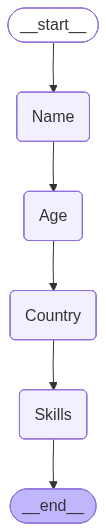

In [57]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [58]:
result = app.invoke({
    "name": "Radha",
    "country": "India",
    "age": 24,
    "skills": ["Reading", "Story Telling", "Singing", "Dancing"],
    "final": ""
})


In [59]:
print(result["final"])

Hi Radha!
Radha is 24 years old.
Radha is citizen of country India.
Skills of Radha are: Reading, Story Telling, Singing and Dancing


In [60]:
Name=input("Enter your name: ")
Age=input("Enter your age: ")
Country=input("Enter your country: ")
Skills=input("Enter your skills: ")

Enter your name: Oo
Enter your age: 11
Enter your country: US
Enter your skills: Agentic AI


In [61]:
skills=[skill.strip() for skill in Skills.split(',')]

In [62]:
output=app.invoke({"name":Name,"age":Age,"country":Country,"skills":skills,"final":""})

In [63]:
print(output["final"])

Hi Oo!
Oo is 11 years old.
Oo is citizen of country US.
Skills of Oo are: Agentic AI


**Graph : 7 : Conditional Graph**

In [64]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [65]:
class DecisionAgent(TypedDict):
  num1:int
  operation:str
  num2:int
  final:int

In [66]:
def adder(state: DecisionAgent)->DecisionAgent:
  """This node adds 2 numbers"""
  state["final"]=state["num1"]+state["num2"]
  return state

def substracter(state: DecisionAgent)->DecisionAgent:
  """This node substracts 2 numbers"""
  state["final"]=state["num1"]-state["num2"]
  return state

def multiplicater(state: DecisionAgent)->DecisionAgent:
  """This node multiply 2 numbers"""
  state["final"]=state["num1"]*state["num2"]
  return state

def divider(state: DecisionAgent)->DecisionAgent:
  """This node divides 2 numbers"""
  state["final"]=state["num1"]/state["num2"]
  return state

def modulater(state: DecisionAgent)->DecisionAgent:
  """This node find remender of 2 numbers"""
  state["final"]=state["num1"]%state["num2"]
  return state

def expoentier(state: DecisionAgent)->DecisionAgent:
  """This node find exponential of given numbers"""
  state["final"]=state["num1"]**state["num2"]
  return state

def decisionNode(state: DecisionAgent)->DecisionAgent:
  """This node will select the next node of the graph"""
  opr=state["operation"]
  if opr=='+':
    return "Addition_operation"
  elif opr=='-':
    return "Substraction_operation"
  elif opr=='*':
    return "Multiplication_operation"
  elif opr=='/':
    return "Division_operation"
  elif opr=='%':
    return "Module_operation"
  elif opr=='**':
    return "Power_operation"

In [67]:
graph=StateGraph(DecisionAgent)
graph.add_node("Addition",adder)
graph.add_node("Substraction",substracter)
graph.add_node("Multiplication",multiplicater)
graph.add_node("Division",divider)
graph.add_node("Modulas",modulater)
graph.add_node("Power",expoentier)
graph.add_node("Decision",lambda state:state) #passthrough function
graph.add_edge(START,"Decision")
graph.add_conditional_edges(
    "Decision",decisionNode,
    {
        "Addition_operation":"Addition",
        "Substraction_operation":"Substraction",
        "Multiplication_operation":"Multiplication",
        "Division_operation":"Division",
        "Module_operation":"Modulas",
        "Power_operation":"Power"
    }
)
graph.add_edge("Addition",END)
graph.add_edge("Substraction",END)
graph.add_edge("Multiplication",END)
graph.add_edge("Division",END)
graph.add_edge("Modulas",END)
graph.add_edge("Power",END)

app=graph.compile()


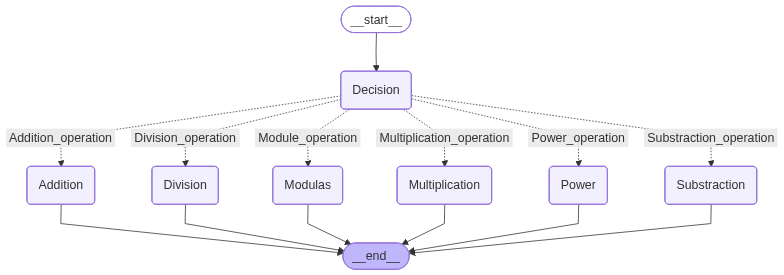

In [68]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [69]:
inital=DecisionAgent(num1=19,num2=10,operation="*")
print(app.invoke(inital))

{'num1': 19, 'operation': '*', 'num2': 10, 'final': 190}


**`WITH USER INPUT`**

In [73]:
user_name = input("Enter your name: ")

def smart_convert(value):
    """Convert input to int, float, or leave as string."""
    try:
        if '.' in value:
            return float(value)
        return int(value)
    except ValueError:
        return value  # return string if not numeric

while True:
    operation = input("Enter the operation you want to perform (+, -, *, /, concat, or custom): ").strip()
    print("Enter the numbers or strings:")
    num1 = smart_convert(input("First Input: "))
    num2 = smart_convert(input("Second Input: "))

    # Example app logic (replace this with your actual app.invoke call)
    if operation == '+':
        final = num1 + num2
    elif operation == '-':
        final = num1 - num2
    elif operation == '*':
        final = num1 * num2
    elif operation == '/':
        try:
            final = num1 / num2
        except ZeroDivisionError:
            final = "Error: Division by zero"
    elif operation.lower() == 'concat':
        final = str(num1) + str(num2)
    else:
        final = f"Unknown operation '{operation}'."

    # If you have app.invoke:
    # output = app.invoke({"num1": num1, "num2": num2, "operation": operation, "final": ""})
    # print(output["final"])

    print(f"Result: {final}")

    choice = input(f"{user_name}, do you want to perform another operation (yes/no)? ").strip().lower()
    if choice not in ['yes', 'y']:
        print("Thank You! Have A Nice Day 😊")
        break


Enter your name: N
Enter the operation you want to perform (+, -, *, /, concat, or custom): /
Enter the numbers or strings:
First Input: 34
Second Input: 6
Result: 5.666666666666667
N, do you want to perform another operation (yes/no)? yes
Enter the operation you want to perform (+, -, *, /, concat, or custom): concat
Enter the numbers or strings:
First Input: Agentic
Second Input: AI
Result: AgenticAI
N, do you want to perform another operation (yes/no)? no
Thank You! Have A Nice Day 😊


**DOUBLE DECISION NODE**: **GRAPH : 8**

In [74]:
class MathDecisionAgent(TypedDict):
  num1:int
  operation1:str
  num2:int
  num3:int
  num4:int
  operation2:str
  final1:str
  final2:int

In [75]:
def adder1(state: MathDecisionAgent)->MathDecisionAgent:
  """This node adds 2 numbers"""
  state["final1"]=state["num1"]+state["num2"]
  return state

def substracter1(state: MathDecisionAgent)->MathDecisionAgent:
  """This node substracts 2 numbers"""
  state["final1"]=state["num1"]-state["num2"]
  return state

def multiplicater1(state: MathDecisionAgent)->MathDecisionAgent:
  """This node multiply 2 numbers"""
  state["final1"]=state["num1"]*state["num2"]
  return state

def divider1(state: MathDecisionAgent)->MathDecisionAgent:
  """This node divides 2 numbers"""
  state["final1"]=state["num1"]/state["num2"]
  return state

def decisionNode1(state: MathDecisionAgent)->MathDecisionAgent:
  """This node will select the next node of the graph"""
  opr=state["operation1"]
  if opr=='+':
    return "Addition_operation"
  elif opr=='-':
    return "Substraction_operation"
  elif opr=='*':
    return "Multiplication_operation"
  elif opr=='/':
    return "Division_operation"
  elif opr=='%':
    return "Module_operation"
  elif opr=='**':
    return "Power_operation"
# FOR SECOND DECISION NODE
def adder2(state: MathDecisionAgent)->MathDecisionAgent:
  """This node adds 2 numbers"""
  state["final2"]=state["num3"]+state["num4"]
  return state

def substracter2(state: MathDecisionAgent)->MathDecisionAgent:
  """This node substracts 2 numbers"""
  state["final2"]=state["num3"]-state["num4"]
  return state

def multiplicater2(state: MathDecisionAgent)->MathDecisionAgent:
  """This node multiply 2 numbers"""
  state["final2"]=state["num3"]*state["num4"]
  return state

def divider2(state: MathDecisionAgent)->MathDecisionAgent:
  """This node divides 2 numbers"""
  state["final2"]=state["num3"]/state["num4"]
  return state

def decisionNode2(state: MathDecisionAgent)->MathDecisionAgent:
  """This node will select the next node of the graph"""
  opr1=state["operation2"]
  if opr1=='+':
    return "Addition_operation"
  elif opr1=='-':
    return "Substraction_operation"
  elif opr1=='*':
    return "Multiplication_operation"
  elif opr1=='/':
    return "Division_operation"
  elif opr1=='%':
    return "Module_operation"
  elif opr1=='**':
    return "Power_operation"

In [76]:

graph = StateGraph(MathDecisionAgent)
# Add nodes
graph.add_node("Addition", adder1)
graph.add_node("Substraction", substracter1)
graph.add_node("Multiplication", multiplicater1)
graph.add_node("Division", divider1)

graph.add_node("Addition2", adder2)
graph.add_node("Substraction2", substracter2)
graph.add_node("Multiplication2", multiplicater2)
graph.add_node("Division2", divider2)

graph.add_node("Decision1", lambda state: state)
graph.add_node("Decision2", lambda state: state)

# Set entry point
graph.set_entry_point("Decision1")

# Conditional branching for first operation
graph.add_conditional_edges("Decision1", decisionNode1, {
    "Addition_operation": "Addition",
    "Substraction_operation": "Substraction",
    "Multiplication_operation": "Multiplication",
    "Division_operation": "Division"
})

# Connect Op1 nodes to Decision2
graph.add_edge("Addition", "Decision2")
graph.add_edge("Substraction", "Decision2")
graph.add_edge("Multiplication", "Decision2")
graph.add_edge("Division", "Decision2")

# Conditional branching for second operation
graph.add_conditional_edges("Decision2", decisionNode2, {
    "Addition_operation": "Addition2",
    "Substraction_operation": "Substraction2",
    "Multiplication_operation": "Multiplication2",
    "Division_operation": "Division2"
})

# ✅ Now all Op2 nodes go directly to END
graph.add_edge("Addition2", END)
graph.add_edge("Substraction2", END)
graph.add_edge("Multiplication2", END)
graph.add_edge("Division2", END)

# Compile the graph
app = graph.compile()


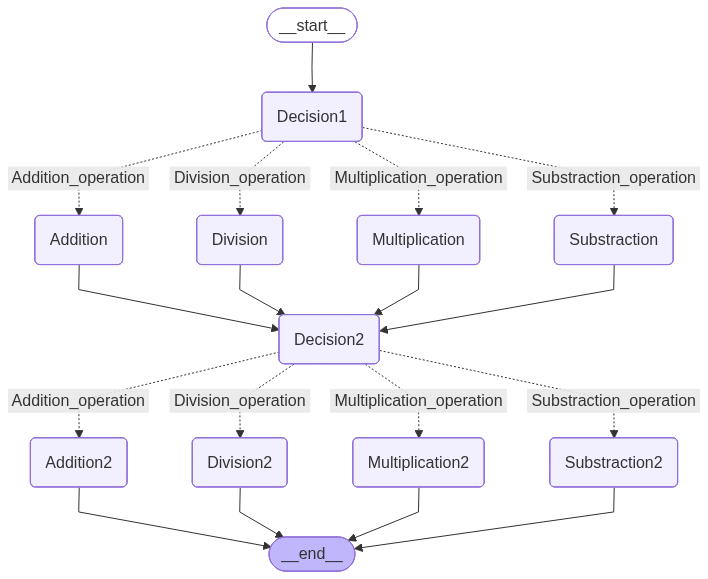

In [77]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [78]:
output = app.invoke({
    "num1": 12,
    "num2": 10,
    "num3": 20,
    "num4": 15,
    "operation1": "*",
    "operation2": "-",
    "final1":0 ,
    "final2": 0
})


In [79]:
print(output["final1"],output["final2"],end="\n")

120 5


In [81]:
user_name=input("Enter your name: ")
while True:
  operation1=input("Enter the first operation you want to perform: ")
  operation2=input("Enter the second operation you want to perform: ")
  print("Enter the numbers: ")
  num1=int(input("First Number:"))
  num2=int(input("Second Number:"))
  num3=int(input("Third Number:"))
  num4=int(input("Fourth Number:"))
  output=app.invoke({"num1":num1,"num2":num2,"num3":num3,"num4":num4,"operation1":operation1,"operation2":operation2,"final1":"","final2":""})
  print(output["final1"])
  print(output["final2"])
  choice=input(f"{user_name} Do you want to perform anoter operation(yes/no): ").strip().lower()
  if choice not in['yes','y']:
    print("Thank You ! Have A Nice Day")
    break

Enter your name: Ba
Enter the first operation you want to perform: +
Enter the second operation you want to perform: -
Enter the numbers: 
First Number:34
Second Number:88
Third Number:4
Fourth Number:9
122
-5
Ba Do you want to perform anoter operation(yes/no): no
Thank You ! Have A Nice Day


**GRAPH : 9 : Looping Graph**

In [82]:
from langgraph.graph import StateGraph,END
import random
from typing import Dict,List,TypedDict

In [83]:
class LoopDecisionAgent(TypedDict):
  name:str
  number:List[int]
  counter:int

In [84]:
print("Welcome To The Random Number Generator ")
counter=int(input("Enter the count of random numbers you want to generate in range of 0 to 1000: "))

Welcome To The Random Number Generator 
Enter the count of random numbers you want to generate in range of 0 to 1000: 5


In [86]:
def greeting_node(state:LoopDecisionAgent)->LoopDecisionAgent:
  """Greeting Node Which Says Hi To The Person"""
  state["name"]=f"Hi there, {state['name']}"
  state["counter"]=0
  return state

def Decision_Looping_Node(state:LoopDecisionAgent)->LoopDecisionAgent:
  """Generates a random number between 0 10 1000"""
  state["number"].append(random.randint(0,1000))
  state["counter"] +=1

  return state

def should_continue(state: Decision_Looping_Node)->Decision_Looping_Node:
  """Function to decide what to decide next"""
  if state["counter"]<counter:
    print("Entering Loop",state["counter"])
    return "loop"   #Continue Loop
  else:
    return "exit"   #Exit the loop

In [87]:
graph=StateGraph(LoopDecisionAgent)
graph.add_node("Greeting",greeting_node)
graph.add_node("Decision",Decision_Looping_Node)
graph.add_edge("Greeting","Decision")

graph.add_conditional_edges(
    "Decision", #Source Node
    should_continue,    #Routing Function
    {
        "loop":"Decision",  #Self loop back to same node
        "exit":END              #End The Graph
    }
)
graph.set_entry_point("Greeting")

app=graph.compile()

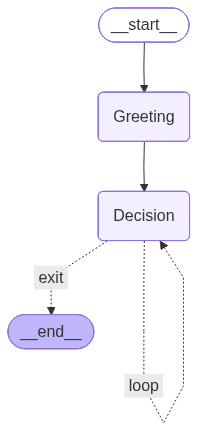

In [88]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [91]:
result=app.invoke({"name":"Sa",
  "number":[],
  "counter":counter})

Entering Loop 1
Entering Loop 2
Entering Loop 3
Entering Loop 4


In [92]:
print(result)

{'name': 'Hi there, Sa', 'number': [333, 232, 799, 306, 333], 'counter': 5}


**LangGraph**

In [94]:
pip install langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.8 MB/s eta 0:00:00


In [95]:
from langchain.chat_models import init_chat_model
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode,tools_condition

In [96]:
pip install load_dotenv

In [97]:
from dotenv import load_dotenv
load_dotenv()

False

In [98]:
pip install Annotated

In [99]:
from typing import TypedDict, List
  # Message have the type "List".The 'add_message' function
  # in the annotation defines how this state key should be updated
  # (in this case, it appends messgaes to the list, rather than overwriting them)

class State(TypedDict):
    messages: List[str]  # or whatever type your messages are


In [100]:
from getpass import getpass
import os

# Enter the key securely (won't be visible when typed)
os.environ['API_KEY'] = getpass('Enter your API key: ')

# Use the key
api_key = os.environ['API_KEY']


Enter your API key: ··········


In [101]:
!pip install -U langchain langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.7 MB/s eta 0:00:00


In [102]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage

@tool
def get_stock_price(symbol: str) -> float:
    """Return the current price of stock given the stock symbol."""
    return {
        "MSFT": 200.3,
        "AAPL": 100.4,
        "AMZN": 150.0,
        "RIL": 87.6
    }.get(symbol, 0.0)

tools = [get_stock_price]

# Initialize Gemini LLM
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro", temperature=0.7)

# Bind tools
llm_with_tools = llm.bind_tools(tools)

In [103]:
def chatbot(state:State):
  return {"messages":[llm_with_tools.invoke(state["message"])]}

builder=StateGraph(State)
builder.add_node(chatbot)